In [2]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(scales)
library(NICHES)
library(stringr)
library(reshape2)
library(cowplot)

In [3]:
options(warn=-1)

In [5]:
male_24weeks_rds <- readRDS('../combined_male_24weeks.rds')

In [6]:
data.list <- SplitObject(male_24weeks_rds, split.by="sample_type")

In [10]:
data.list[1]
data.list[2]

$taPVAT_Control_24W_M
An object of class Seurat 
20743 features across 11457 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


$taPVAT_HF_24W_M
An object of class Seurat 
20743 features across 11457 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


In [11]:
table(data.list[[1]]@meta.data['celltype_broad'])
table(data.list[[2]]@meta.data['celltype_broad'])

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             7500              2422               660               324 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              125                19               376                31 

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             7635              2078               792               451 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              130                 8               325                38 

In [12]:
max.cells <- min(ncol(data.list[[1]]),ncol(data.list[[2]])) 

for (i in 1:length(data.list)){
  Idents(data.list[[i]]) <- data.list[[i]]$sample_type
  data.list[[i]] <- subset(data.list[[i]],cells = WhichCells(data.list[[i]],downsample = max.cells))
  Idents(data.list[[i]]) <- data.list[[i]]$celltype_broad
}

In [13]:
max.cells

[1] 11457

In [14]:
distribution <- data.frame(CTRL = table(Idents(data.list[[1]])),
                            HF = table(Idents(data.list[[2]])))
distribution <- reshape2::melt(distribution)

Using CTRL.Var1, HF.Var1 as id variables



In [15]:
distribution

CTRL.Var1         HF.Var1           variable  value
1  Endothelial_Cells Adipocytes        CTRL.Freq 2422 
2  Adipocytes        Endothelial_Cells CTRL.Freq 7500 
3  Pericytes         Immune_Cells      CTRL.Freq  376 
4  Fibroblasts       Fibroblasts       CTRL.Freq  660 
5  Immune_Cells      Mesothelial_Cells CTRL.Freq  324 
6  SMCs              Pericytes         CTRL.Freq   31 
7  Mesothelial_Cells SMCs              CTRL.Freq  125 
8  Neuronal_Cells    Neuronal_Cells    CTRL.Freq   19 
9  Endothelial_Cells Adipocytes        HF.Freq   7635 
10 Adipocytes        Endothelial_Cells HF.Freq   2078 
11 Pericytes         Immune_Cells      HF.Freq    451 
12 Fibroblasts       Fibroblasts       HF.Freq    792 
13 Immune_Cells      Mesothelial_Cells HF.Freq    130 
14 SMCs              Pericytes         HF.Freq    325 
15 Mesothelial_Cells SMCs              HF.Freq     38 
16 Neuronal_Cells    Neuronal_Cells    HF.Freq      8

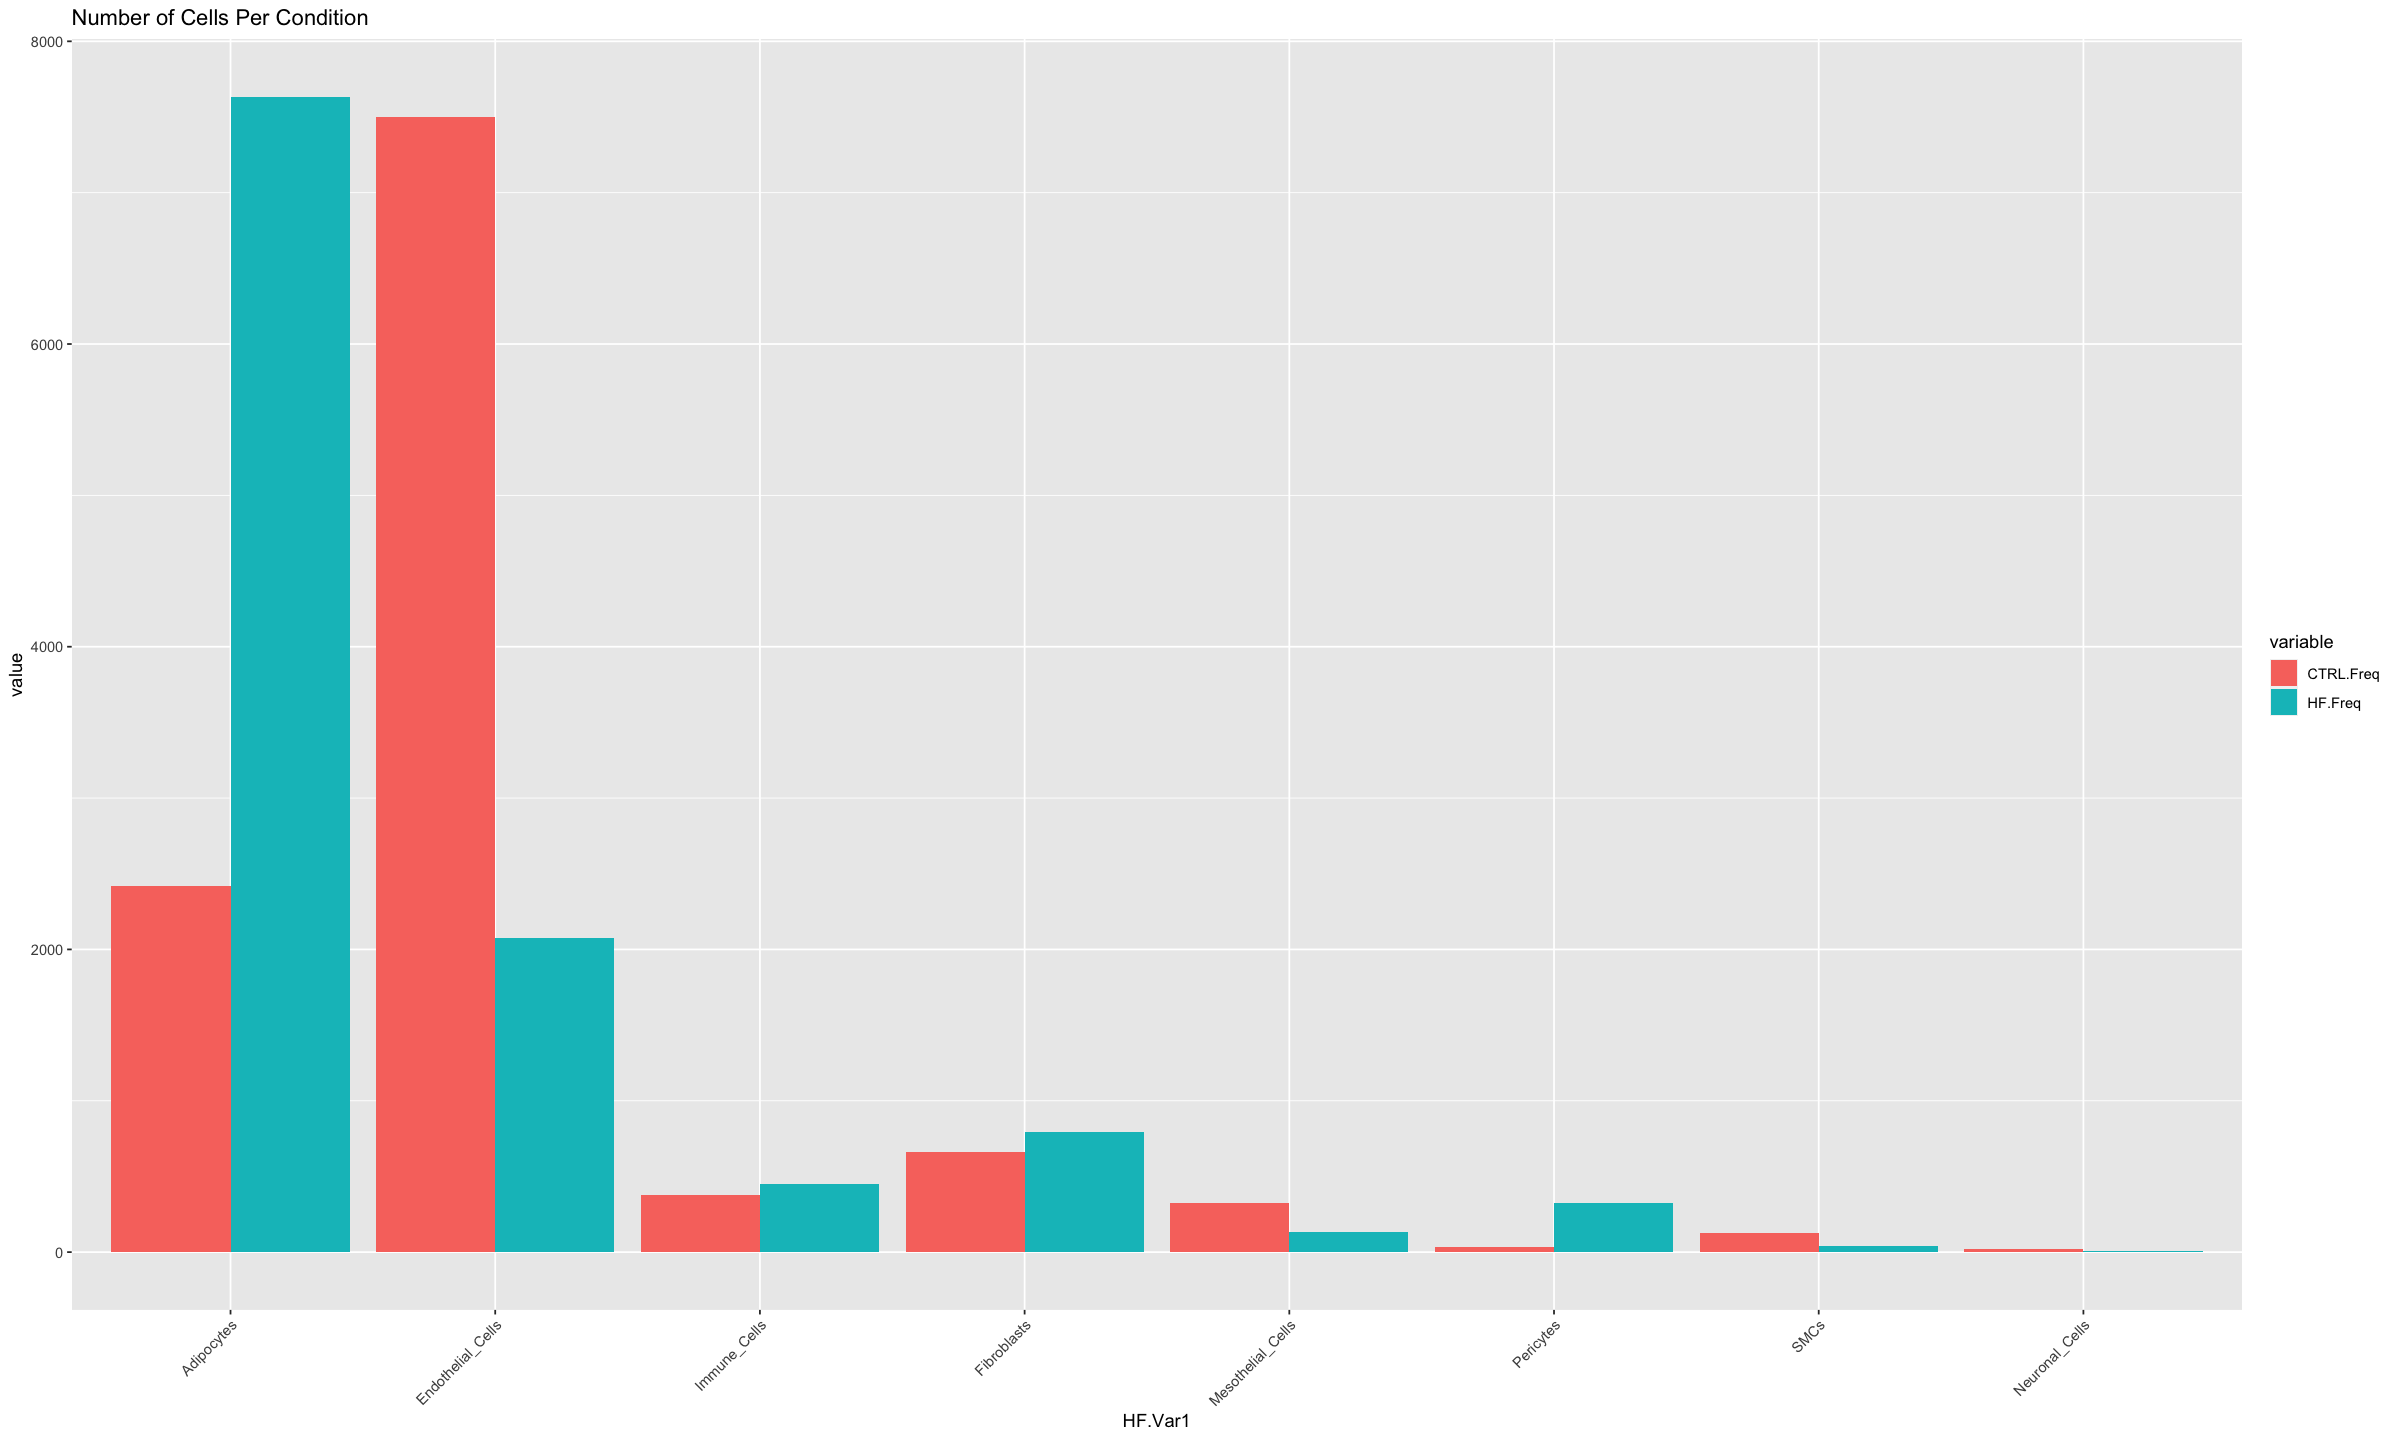

In [16]:
options(repr.plot.width=20, repr.plot.height=12)

ggplot(data = distribution,aes(x = HF.Var1,y=value,fill = variable))+geom_bar(stat='identity',position='dodge')+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
  ggtitle('Number of Cells Per Condition')

In [17]:
ncol(data.list[[1]])==ncol(data.list[[2]])

[1] TRUE

In [18]:
table(data.list[[1]]@meta.data['celltype_broad'])
table(data.list[[2]]@meta.data['celltype_broad'])

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             7500              2422               660               324 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              125                19               376                31 

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             7635              2078               792               451 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              130                 8               325                38 

In [19]:
# Run NICHES on each system and store/name the outputs
scc.list <- list()
for(i in 1:length(data.list)){
  print(i)
  scc.list[[i]] <- RunNICHES(data.list[[i]],
                             LR.database="fantom5",
                             species="mouse",
                             assay="RNA",
                             cell_types = 'celltype_broad',
                             min.cells.per.ident=1,
                             min.cells.per.gene = 50,
                             meta.data.to.map = c('orig.ident','celltype_broad','sample_type'),
                             SystemToCell = T,
                             CellToCell = T,
                             blend = 'mean')
}
names(scc.list) <- names(data.list)

[1] 1


Set cell types as Identity of object internally


 Subsetting to populations with greater than 1 cells


 Subsetting to genes expressed in greater than 50 cells


 11457 distinct cells from 8 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 829 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 25677 Cell-To-Cell edges computed, sampling 64 distinct VectorTypes, out of 64 total possible

Normalizing layer: counts


 11457 System-To-Cell edges were computed, across 8 cell types



[1] 2


Set cell types as Identity of object internally


 Subsetting to populations with greater than 1 cells


 Subsetting to genes expressed in greater than 50 cells


 11457 distinct cells from 8 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 844 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 25955 Cell-To-Cell edges computed, sampling 64 distinct VectorTypes, out of 64 total possible

Normalizing layer: counts


 11457 System-To-Cell edges were computed, across 8 cell types



In [20]:
scc.list

$taPVAT_Control_24W_M
$taPVAT_Control_24W_M$CellToCell
An object of class Seurat 
829 features across 25677 samples within 1 assay 
Active assay: CellToCell (829 features, 0 variable features)
 2 layers present: counts, data

$taPVAT_Control_24W_M$SystemToCell
An object of class Seurat 
829 features across 11457 samples within 1 assay 
Active assay: SystemToCell (829 features, 0 variable features)
 2 layers present: counts, data


$taPVAT_HF_24W_M
$taPVAT_HF_24W_M$CellToCell
An object of class Seurat 
844 features across 25955 samples within 1 assay 
Active assay: CellToCell (844 features, 0 variable features)
 2 layers present: counts, data

$taPVAT_HF_24W_M$SystemToCell
An object of class Seurat 
844 features across 11457 samples within 1 assay 
Active assay: SystemToCell (844 features, 0 variable features)
 2 layers present: counts, data



In [21]:
temp.list <- list()
for(i in 1:length(scc.list)){
temp.list[[i]] <- scc.list[[i]]$SystemToCell # Isolate SystemToCell Signaling, which is all that will be covered in this vignette
temp.list[[i]]$Condition <- names(scc.list)[i] # Tag with metadata
}

In [22]:
temp.list[[1]]@meta.data

orig.ident    nCount_SystemToCell
System—AAACCCAAGGTTACCT-1-6 SeuratProject  28.98378          
System—AAACCCACAGGCCCTA-1-6 SeuratProject  54.62468          
System—AAACCCACATGAGTAA-1-6 SeuratProject  75.51793          
System—AAACGAACATAATCGC-1-6 SeuratProject  35.01738          
System—AAACGCTGTATGGTTC-1-6 SeuratProject  84.85168          
System—AAACGCTTCATGCCCT-1-6 SeuratProject  36.95554          
System—AAACGCTTCGCAACAT-1-6 SeuratProject  43.44954          
System—AAAGAACTCTCACCCA-1-6 SeuratProject  44.39103          
System—AAAGGATCACGCAGTC-1-6 SeuratProject  84.45607          
System—AAAGGATTCACTACTT-1-6 SeuratProject  62.03408          
System—AAAGGATTCATCTACT-1-6 SeuratProject  45.50825          
System—AAAGGGCAGCGACTAG-1-6 SeuratProject  34.83053          
System—AAAGGGCAGGTGATCG-1-6 SeuratProject  36.29709          
System—AAAGGGCGTGGCTCTG-1-6 SeuratProject  54.20370          
System—AAAGGTAGTCTGTGCG-1-6 SeuratProject  63.72794          
System—AAAGTGATCTACTATC-1-6 SeuratProject 106.56656          
System—AACAAAGGTAGCGATG-1-6 SeuratProject  62.17244          
System—AACAACCAGATCCGAG-1-6 SeuratProject  57.15160          
System—AACAACCCACCGGAAA-1-6 SeuratProject  35.08973          
System—AACAACCCACTGAGTT-1-6 SeuratProject 106.73643          
System—AACACACTCCACTTCG-1-6 SeuratProject  62.74503          
System—AACAGGGAGGATCATA-1-6 SeuratProject  60.05489          
System—AACAGGGCACAAGGTG-1-6 SeuratProject  20.89589          
System—AACCACAAGGGTTAGC-1-6 SeuratProject  76.64583          
System—AACCACAAGGTCTGGA-1-6 SeuratProject  49.03072          
System—AACCACATCAACTGGT-1-6 SeuratProject  56.42891          
System—AACCACATCACCCTCA-1-6 SeuratProject  84.15610          
System—AACCATGGTACAGCGA-1-6 SeuratProject  38.66414          
System—AACCCAATCATCGCAA-1-6 SeuratProject  50.86436          
System—AACCCAATCGGTGAAG-1-6 SeuratProject  61.03826          
⋮                           ⋮             ⋮                  
System—TTTCGATCAATTGAGA-1-8 SeuratProject  75.10288          
System—TTTCGATCACAATGAA-1-8 SeuratProject  47.70061          
System—TTTCGATCATAACAGA-1-8 SeuratProject  34.58343          
System—TTTCGATTCAATGTCG-1-8 SeuratProject  77.46515          
System—TTTCGATTCATGTCTT-1-8 SeuratProject  84.69660          
System—TTTCGATTCCAAGCCG-1-8 SeuratProject  51.60239          
System—TTTGACTAGCGTCAGA-1-8 SeuratProject  51.87365          
System—TTTGACTAGGCTAGCA-1-8 SeuratProject 101.32199          
System—TTTGACTAGGGCGAGA-1-8 SeuratProject 107.28354          
System—TTTGACTCACAACGCC-1-8 SeuratProject  63.05808          
System—TTTGACTCAGTAGAAT-1-8 SeuratProject  67.90597          
System—TTTGACTGTTCGGTAT-1-8 SeuratProject  24.29595          
System—TTTGACTTCGTGCAGC-1-8 SeuratProject  75.60666          
System—TTTGATCGTCGACTTA-1-8 SeuratProject  40.75276          
System—TTTGATCTCGATACGT-1-8 SeuratProject 128.86737          
System—TTTGATCTCTGTAAGC-1-8 SeuratProject  30.02872          
System—TTTGGAGCACGTGAGA-1-8 SeuratProject  68.46404          
System—TTTGGAGTCGCGAAGA-1-8 SeuratProject  75.63292          
System—TTTGGTTAGCGTGAAC-1-8 SeuratProject  57.81057          
System—TTTGGTTCAGGTGTGA-1-8 SeuratProject  50.79417          
System—TTTGGTTGTAAGTAGT-1-8 SeuratProject  69.27384          
System—TTTGGTTGTAGTAAGT-1-8 SeuratProject  60.62084          
System—TTTGGTTGTGGTCTTA-1-8 SeuratProject  62.87415          
System—TTTGGTTGTTCGAACT-1-8 SeuratProject  47.62363          
System—TTTGTTGCAACGTAAA-1-8 SeuratProject  74.00504          
System—TTTGTTGCATAAGCAA-1-8 SeuratProject  62.80517          
System—TTTGTTGCATCCCACT-1-8 SeuratProject  49.88961          
System—TTTGTTGGTCTCCCTA-1-8 SeuratProject  67.54232          
System—TTTGTTGTCACGGGCT-1-8 SeuratProject  46.99953          
System—TTTGTTGTCGCGAAGA-1-8 SeuratProject  68.82437          
                            nFeature_SystemToCell ReceivingCell       
System—AAACCCAAGGTTACCT-1-6  57                   AAACCCAAGGTTACCT-1-6
System—AAACCCACAGGCCCTA-1-6 169           

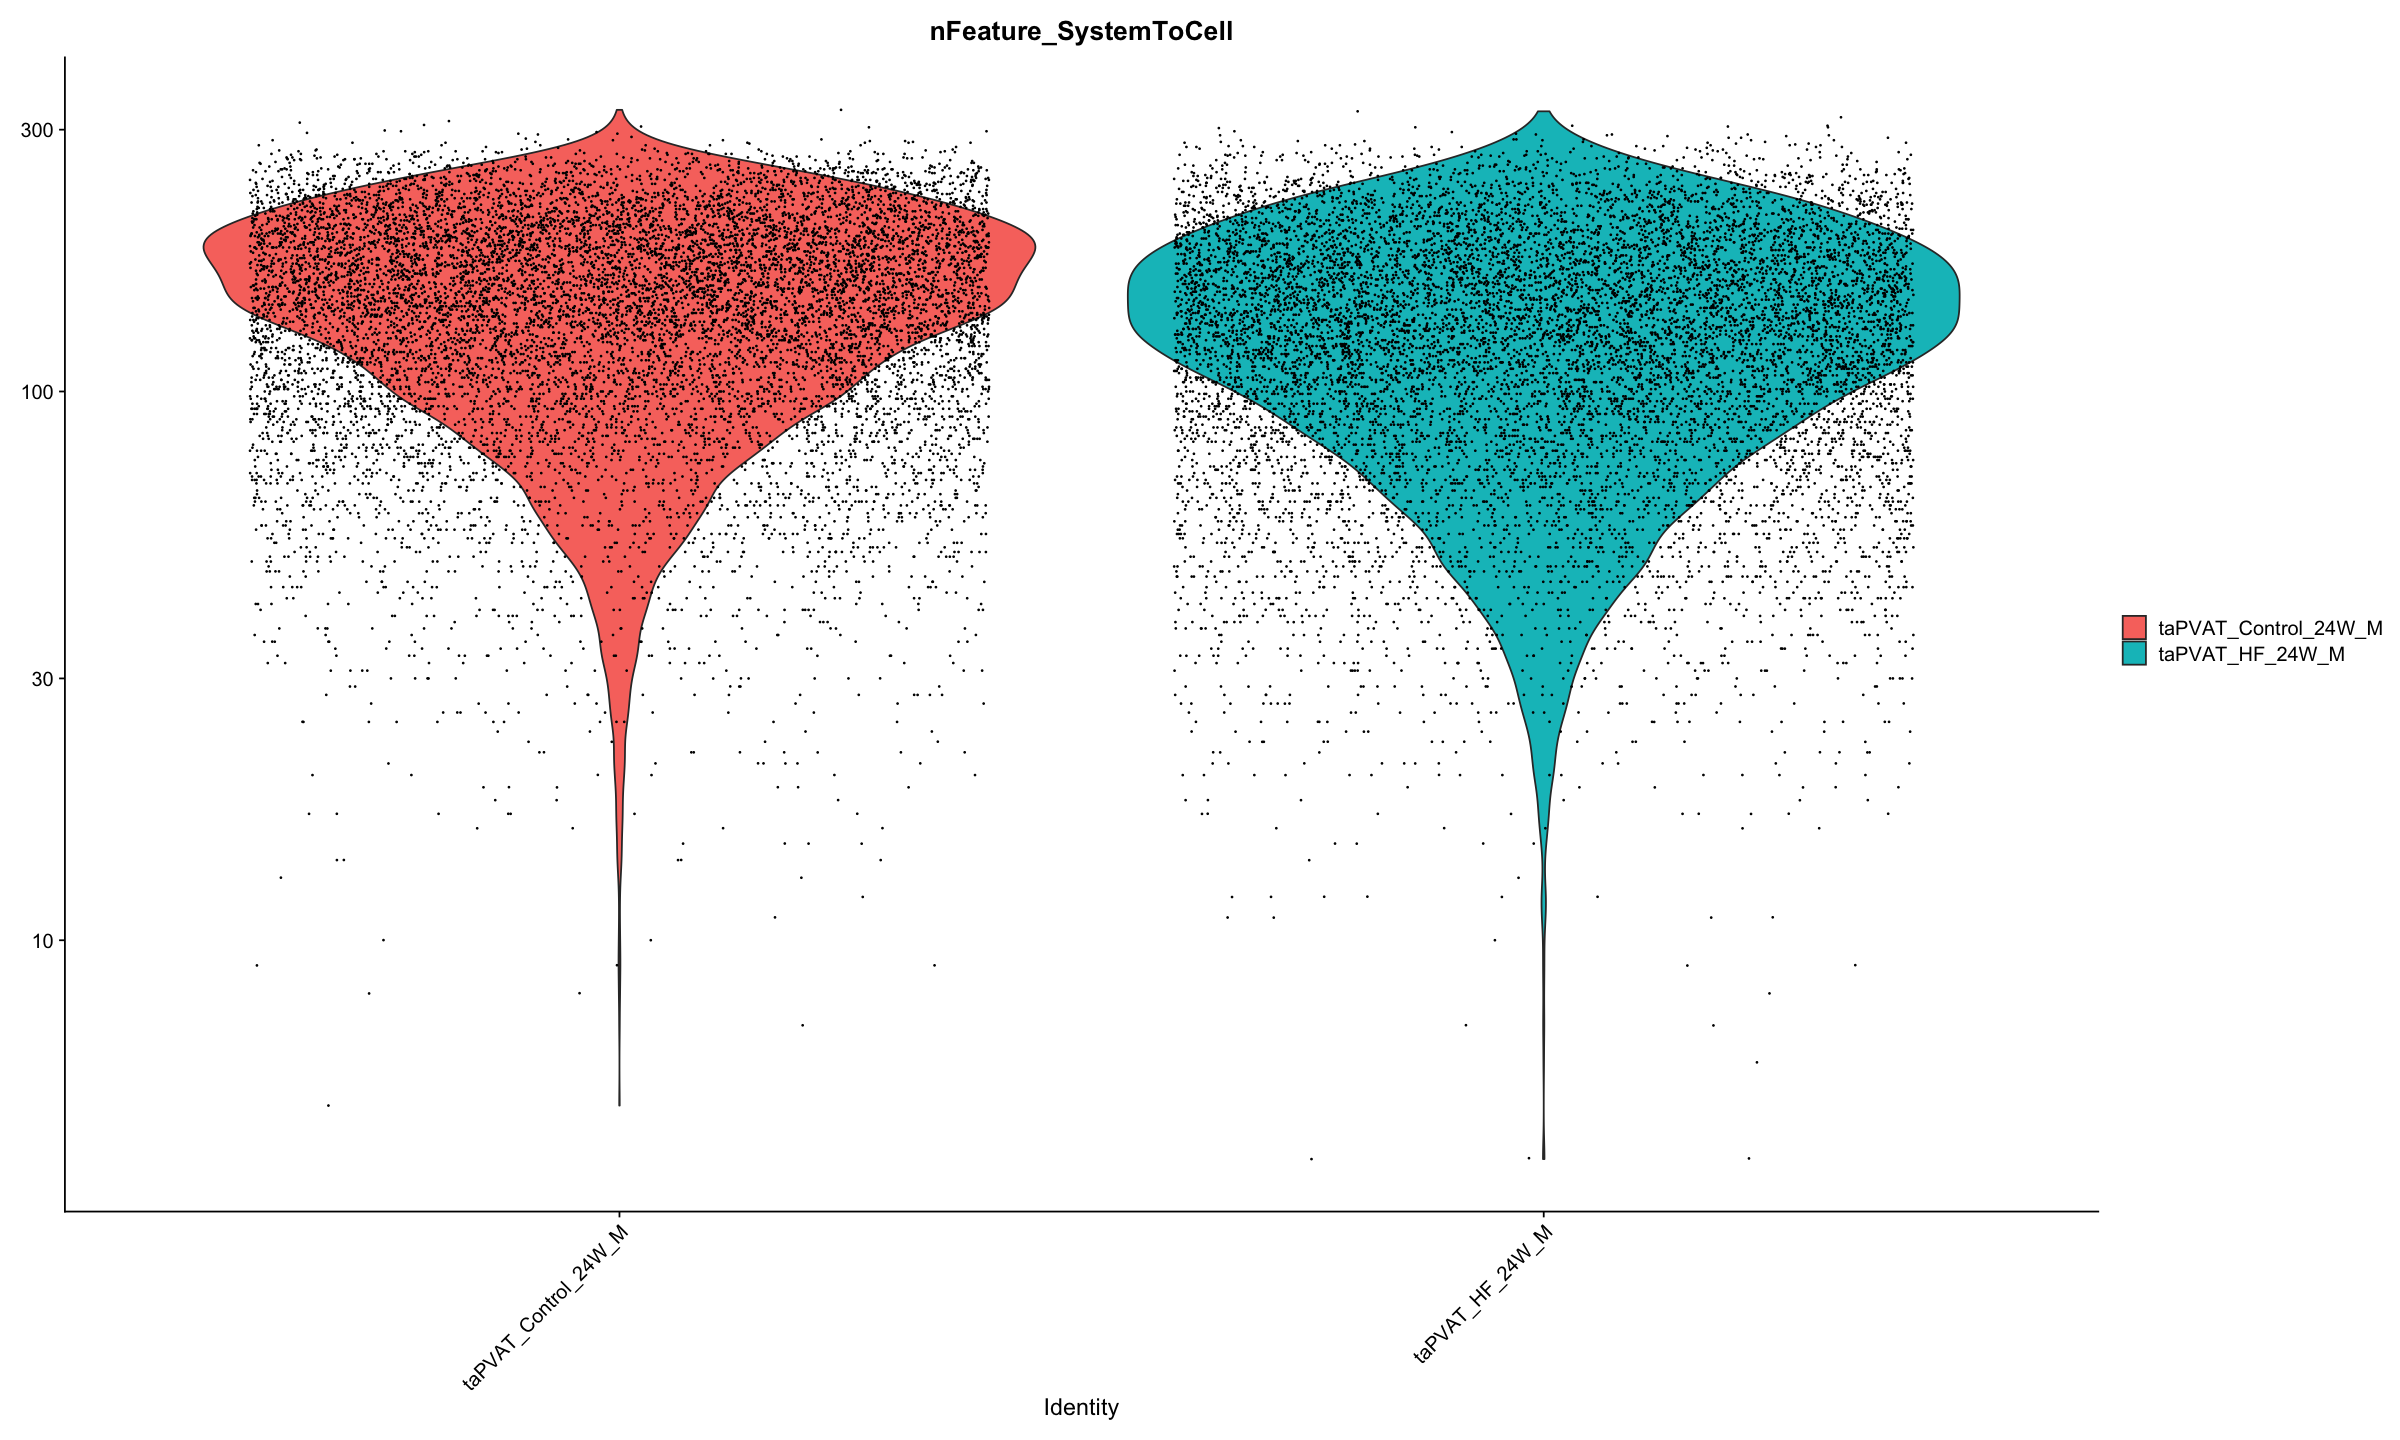

In [23]:
# Merge together
scc.merge <- merge(temp.list[[1]],temp.list[2])

# Clean up low-information crosses (connectivity data can be very sparse)
VlnPlot(scc.merge,features = 'nFeature_SystemToCell',group.by = 'Condition',pt.size=0.1,log = T)

In [24]:
scc.sub <- subset(scc.merge,nFeature_SystemToCell > 5) # Requesting at least 5 distinct ligand-receptor interactions per measurement

Centering and scaling data matrix

Finding variable features for layer data.1

Finding variable features for layer data.2

PC_ 1 
Positive:  Ntf3—Ntrk3, F8—Lrp1, Plat—Lrp1, App—Lrp1, Lrpap1—Lrp1, Serpine1—Lrp1, Hsp90b1—Lrp1, Calr—Lrp1, Serping1—Lrp1, Psap—Lrp1 
	   Serpinc1—Lrp1, Lpl—Lrp1, Apoe—Lrp1, Pdgfb—Lrp1, Plau—Lrp1, Serpine2—Lrp1, Rspo3—Lrp6, Igfbp4—Lrp6, Rspo1—Lrp6, Dkk2—Lrp6 
	   Hspg2—Ptprs, Ptn—Ptprs, Tfpi—Lrp1, Lrpap1—Sorl1, Calm2—Insr, Sorbs1—Insr, Igf1—Insr, Adipoq—Adipor2, B2m—Tfrc, Apoe—Sorl1 
Negative:  Vegfa—Flt1, Pigf—Flt1, Vegfb—Flt1, Vegfc—Flt1, Pdgfc—Flt1, Col18a1—Itgb1, Col6a1—Itgb1, Hspg2—Itgb1, Dusp18—Itgb1, Col6a3—Itgb1 
	   Col4a3—Itgb1, Lamb1—Itgb1, Adam9—Itgb1, Adam17—Itgb1, Nid1—Itgb1, Col6a2—Itgb1, Vegfa—Itgb1, Tgm2—Itgb1, Adam15—Itgb1, Col4a4—Itgb1 
	   Lama2—Itgb1, Lama4—Itgb1, Col3a1—Itgb1, Timp2—Itgb1, Npnt—Itgb1, Lamc1—Itgb1, Reln—Itgb1, Col4a6—Itgb1, Lamb3—Itgb1, Col4a1—Itgb1 
PC_ 2 
Positive:  Vegfb—Flt1, Vegfc—Flt1, Pdgfc—Flt1, Vegfa—Flt1, Pigf—Fl

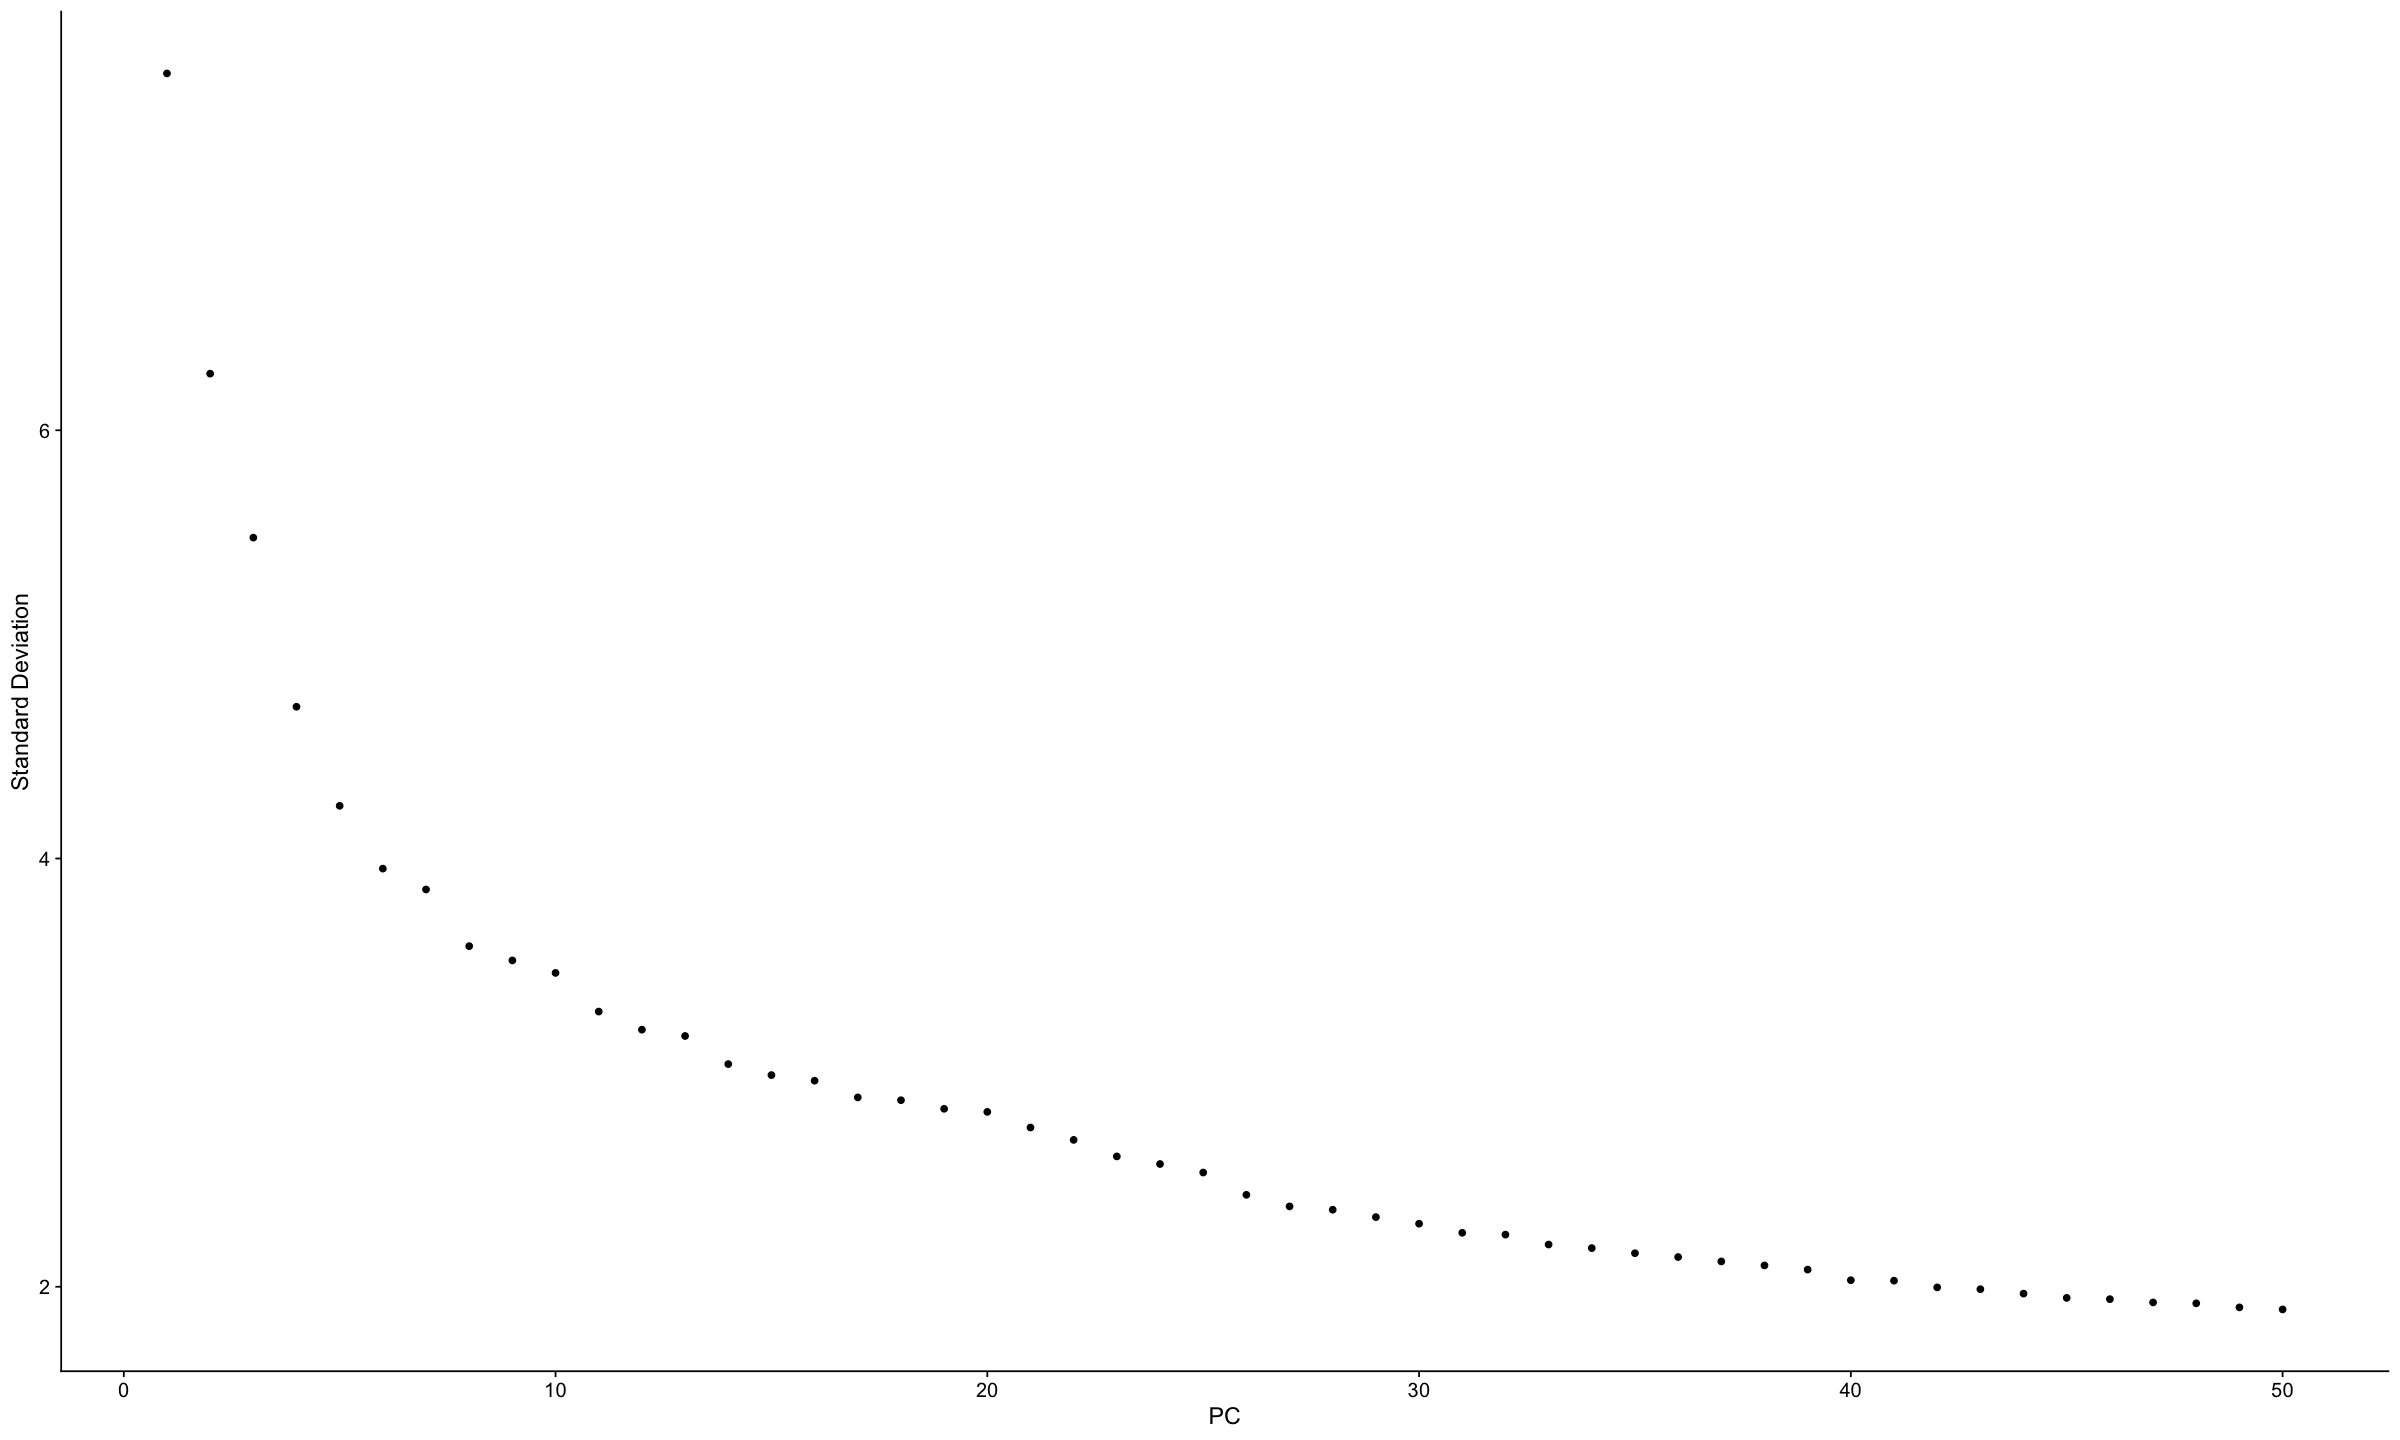

In [25]:
# Perform initial visualization
scc.sub <- ScaleData(scc.sub)
scc.sub <- FindVariableFeatures(scc.sub,selection.method = "disp")
scc.sub <- RunPCA(scc.sub,npcs = 50)
ElbowPlot(scc.sub,ndim=50)

12:45:42 UMAP embedding parameters a = 0.9922 b = 1.112

12:45:42 Read 22909 rows and found 10 numeric columns

12:45:42 Using Annoy for neighbor search, n_neighbors = 30

12:45:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:45:44 Writing NN index file to temp file /var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T//Rtmpuy1cTd/file966f5686045

12:45:44 Searching Annoy index using 1 thread, search_k = 3000

12:45:52 Annoy recall = 100%

12:45:52 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:45:53 Initializing from normalized Laplacian + noise (using RSpectra)

12:45:54 Commencing optimization for 200 epochs, with 883164 positive edges

12:46:14 Optimization finished



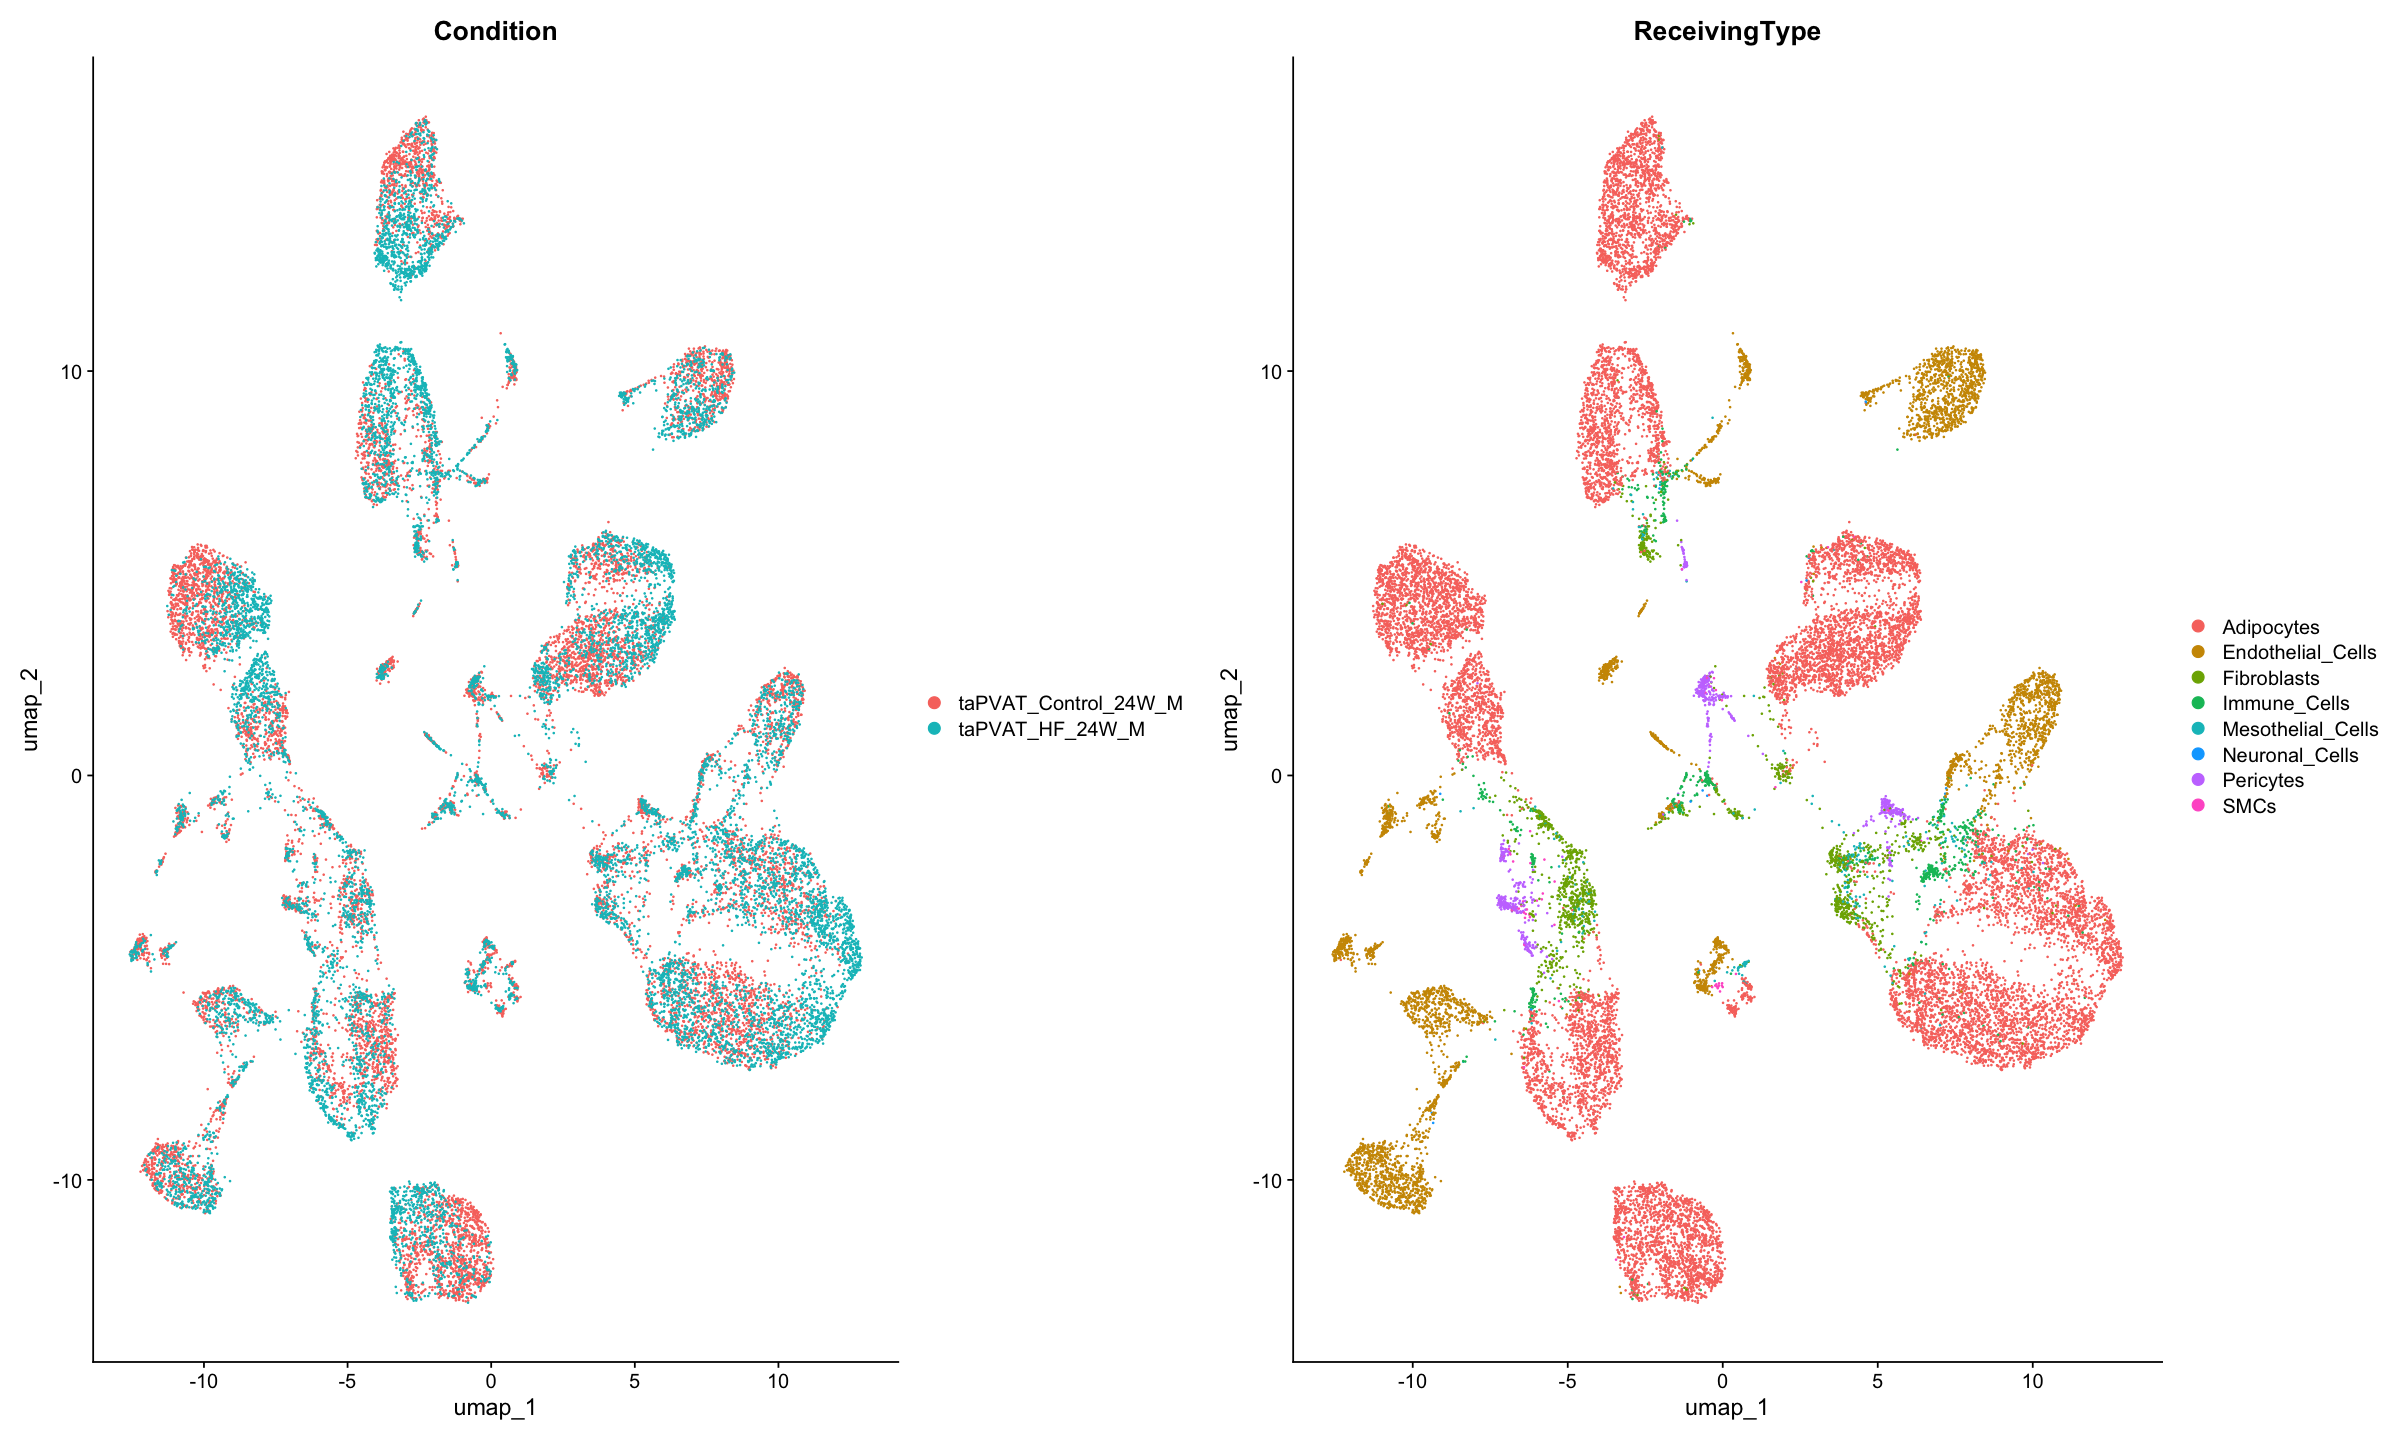

In [26]:
scc.sub <- RunUMAP(scc.sub,dims = 1:10)
p1 <- DimPlot(scc.sub,group.by = 'Condition')
p2 <- DimPlot(scc.sub,group.by = 'ReceivingType')
plot_grid(p1,p2)

In [27]:
unique(scc.sub@meta.data$ReceivingType)
COI <- "Adipocytes"

[1] "Endothelial_Cells" "Adipocytes"        "Pericytes"        
[4] "Fibroblasts"       "Immune_Cells"      "SMCs"             
[7] "Mesothelial_Cells" "Neuronal_Cells"

In [28]:
results <- lapply(COI, function(x){
 
  #subset
  subs <- subset(scc.sub, subset = ReceivingType == x)

  subs <- JoinLayers(subs, layers = c("data", "scale.data"))
  
  #print number of cells per condition
  print(paste0(x , ":  taPVAT_Control_24W_M:", sum(subs@meta.data$Condition == "taPVAT_Control_24W_M")))
  print(paste0(x , ":  taPVAT_HF_24W_M:", sum(subs@meta.data$Condition == "taPVAT_HF_24W_M")))
  
  #set idents
  Idents(subs) <- subs@meta.data$Condition
  
  #scale the subsetted data
  FindVariableFeatures(subs,assay='SystemToCell',selection.method = "disp")
  ScaleData(subs, assay='SystemToCell')
  
  #find markers (here we use ROC)
  markers <- FindAllMarkers(subs, test.use = "roc",assay='SystemToCell',
                            min.pct = 0.1,logfc.threshold = 0.1,
                            return.thresh = 0.1,only.pos = T)
  print(markers)
  
  #subset to top 10 markers per condition
  top10 <- markers %>% group_by(cluster) %>% top_n(n = 10, wt = myAUC)
  list(subs = subs, top10 = top10)
  
  #Make a heatmap
  #DoHeatmap(subs,group.by="ident",features=top10$gene, assay="SystemToCell") +  ggtitle("Top DE SystemToCell Mechanisms, CTRL vs STIM: ",x)
 
  
})

options(repr.plot.width=20, repr.plot.height=12)
options(warn=-1)

subs <- results[[1]]$subs
top10 <- results[[1]]$top10

[1] "Adipocytes:  taPVAT_Control_24W_M:7500"
[1] "Adipocytes:  taPVAT_HF_24W_M:7635"


Finding variable features for layer data

Centering and scaling data matrix

Calculating cluster taPVAT_Control_24W_M

Calculating cluster taPVAT_HF_24W_M



               myAUC     avg_diff power avg_log2FC pct.1 pct.2
Sema3b—Nrp1    0.935 0.0114526672 0.870  6.4751132 0.871 0.000
Sema4f—Nrp2    0.801 0.0060028260 0.602  5.5542024 0.602 0.000
Sema3g—Nrp2    0.801 0.0105484016 0.602  6.3572232 0.602 0.000
Sema3b—Nrp2    0.801 0.0052995996 0.602  5.3780902 0.602 0.000
Rspo4—Lgr4     0.792 0.0113427198 0.584  6.4612777 0.583 0.000
Sema6a—Plxna2  0.753 0.3050251406 0.506  1.2846676 0.787 0.510
Plg—Itgb1      0.717 0.0055321731 0.434  5.4387317 0.433 0.000
Lgals3bp—Itgb1 0.717 0.0059455738 0.434  5.5406371 0.433 0.000
Farp2—Plxna2   0.713 0.3799905612 0.426  1.0813226 0.787 0.510
Nampt—Insr     0.706 0.4631353332 0.412  1.2431719 0.730 0.611
Plau—Lrp1      0.694 0.0126386353 0.388  0.8596138 0.732 0.614
Hras—Insr      0.694 0.0150573368 0.388  0.8080471 0.730 0.611
Pdgfb—Lrp1     0.686 0.0669970284 0.372  0.8602913 0.732 0.614
Calm1—Insr     0.680 0.1876295500 0.360  0.8654836 0.730 0.611
Angptl3—Itgav  0.679 0.0026338162 0.358  4.4028376 0.35

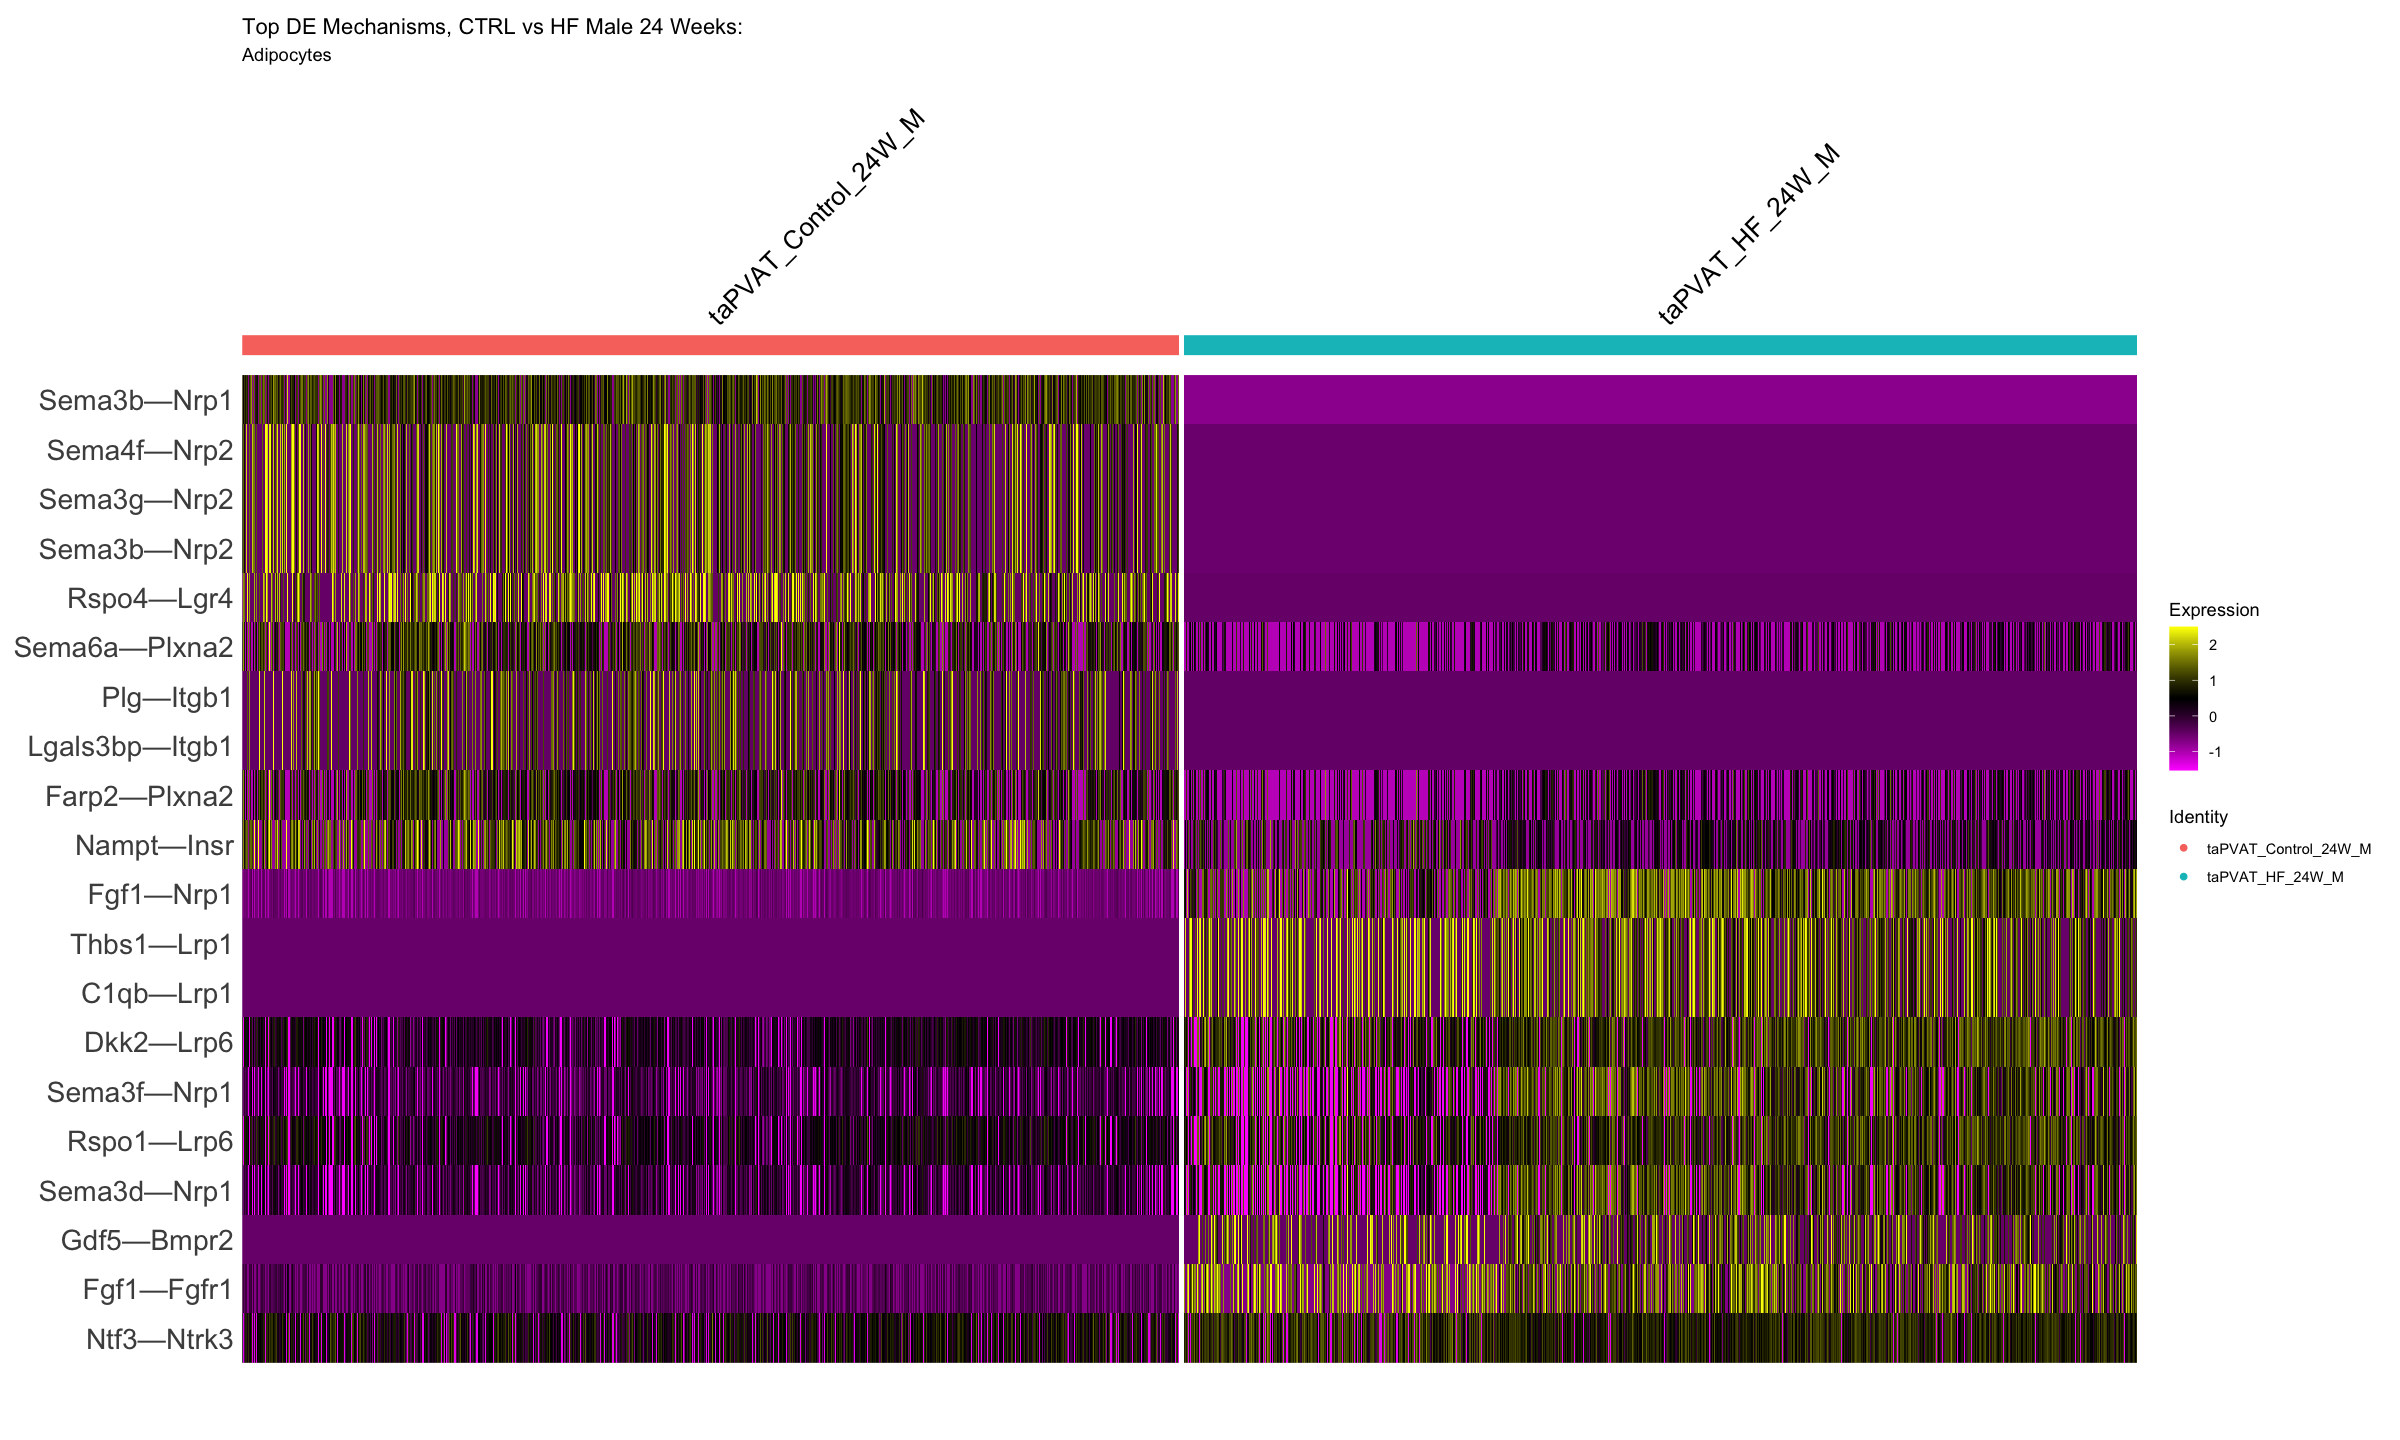

In [29]:
DoHeatmap(subs,group.by="ident",features=top10$gene, assay="SystemToCell") +  ggtitle("Top DE Mechanisms, CTRL vs HF Male 24 Weeks: ",COI) + theme(#axis.text.x = element_text(face = "italic", size = 20),
                                                                   axis.text.y = element_text(size = 17))
                                                                   #axis.title.x = element_text(size = 20),
                                                                   #axis.title.y = element_text(size = 20),
                                                                   #plot.title = element_text(hjust = 0.5))

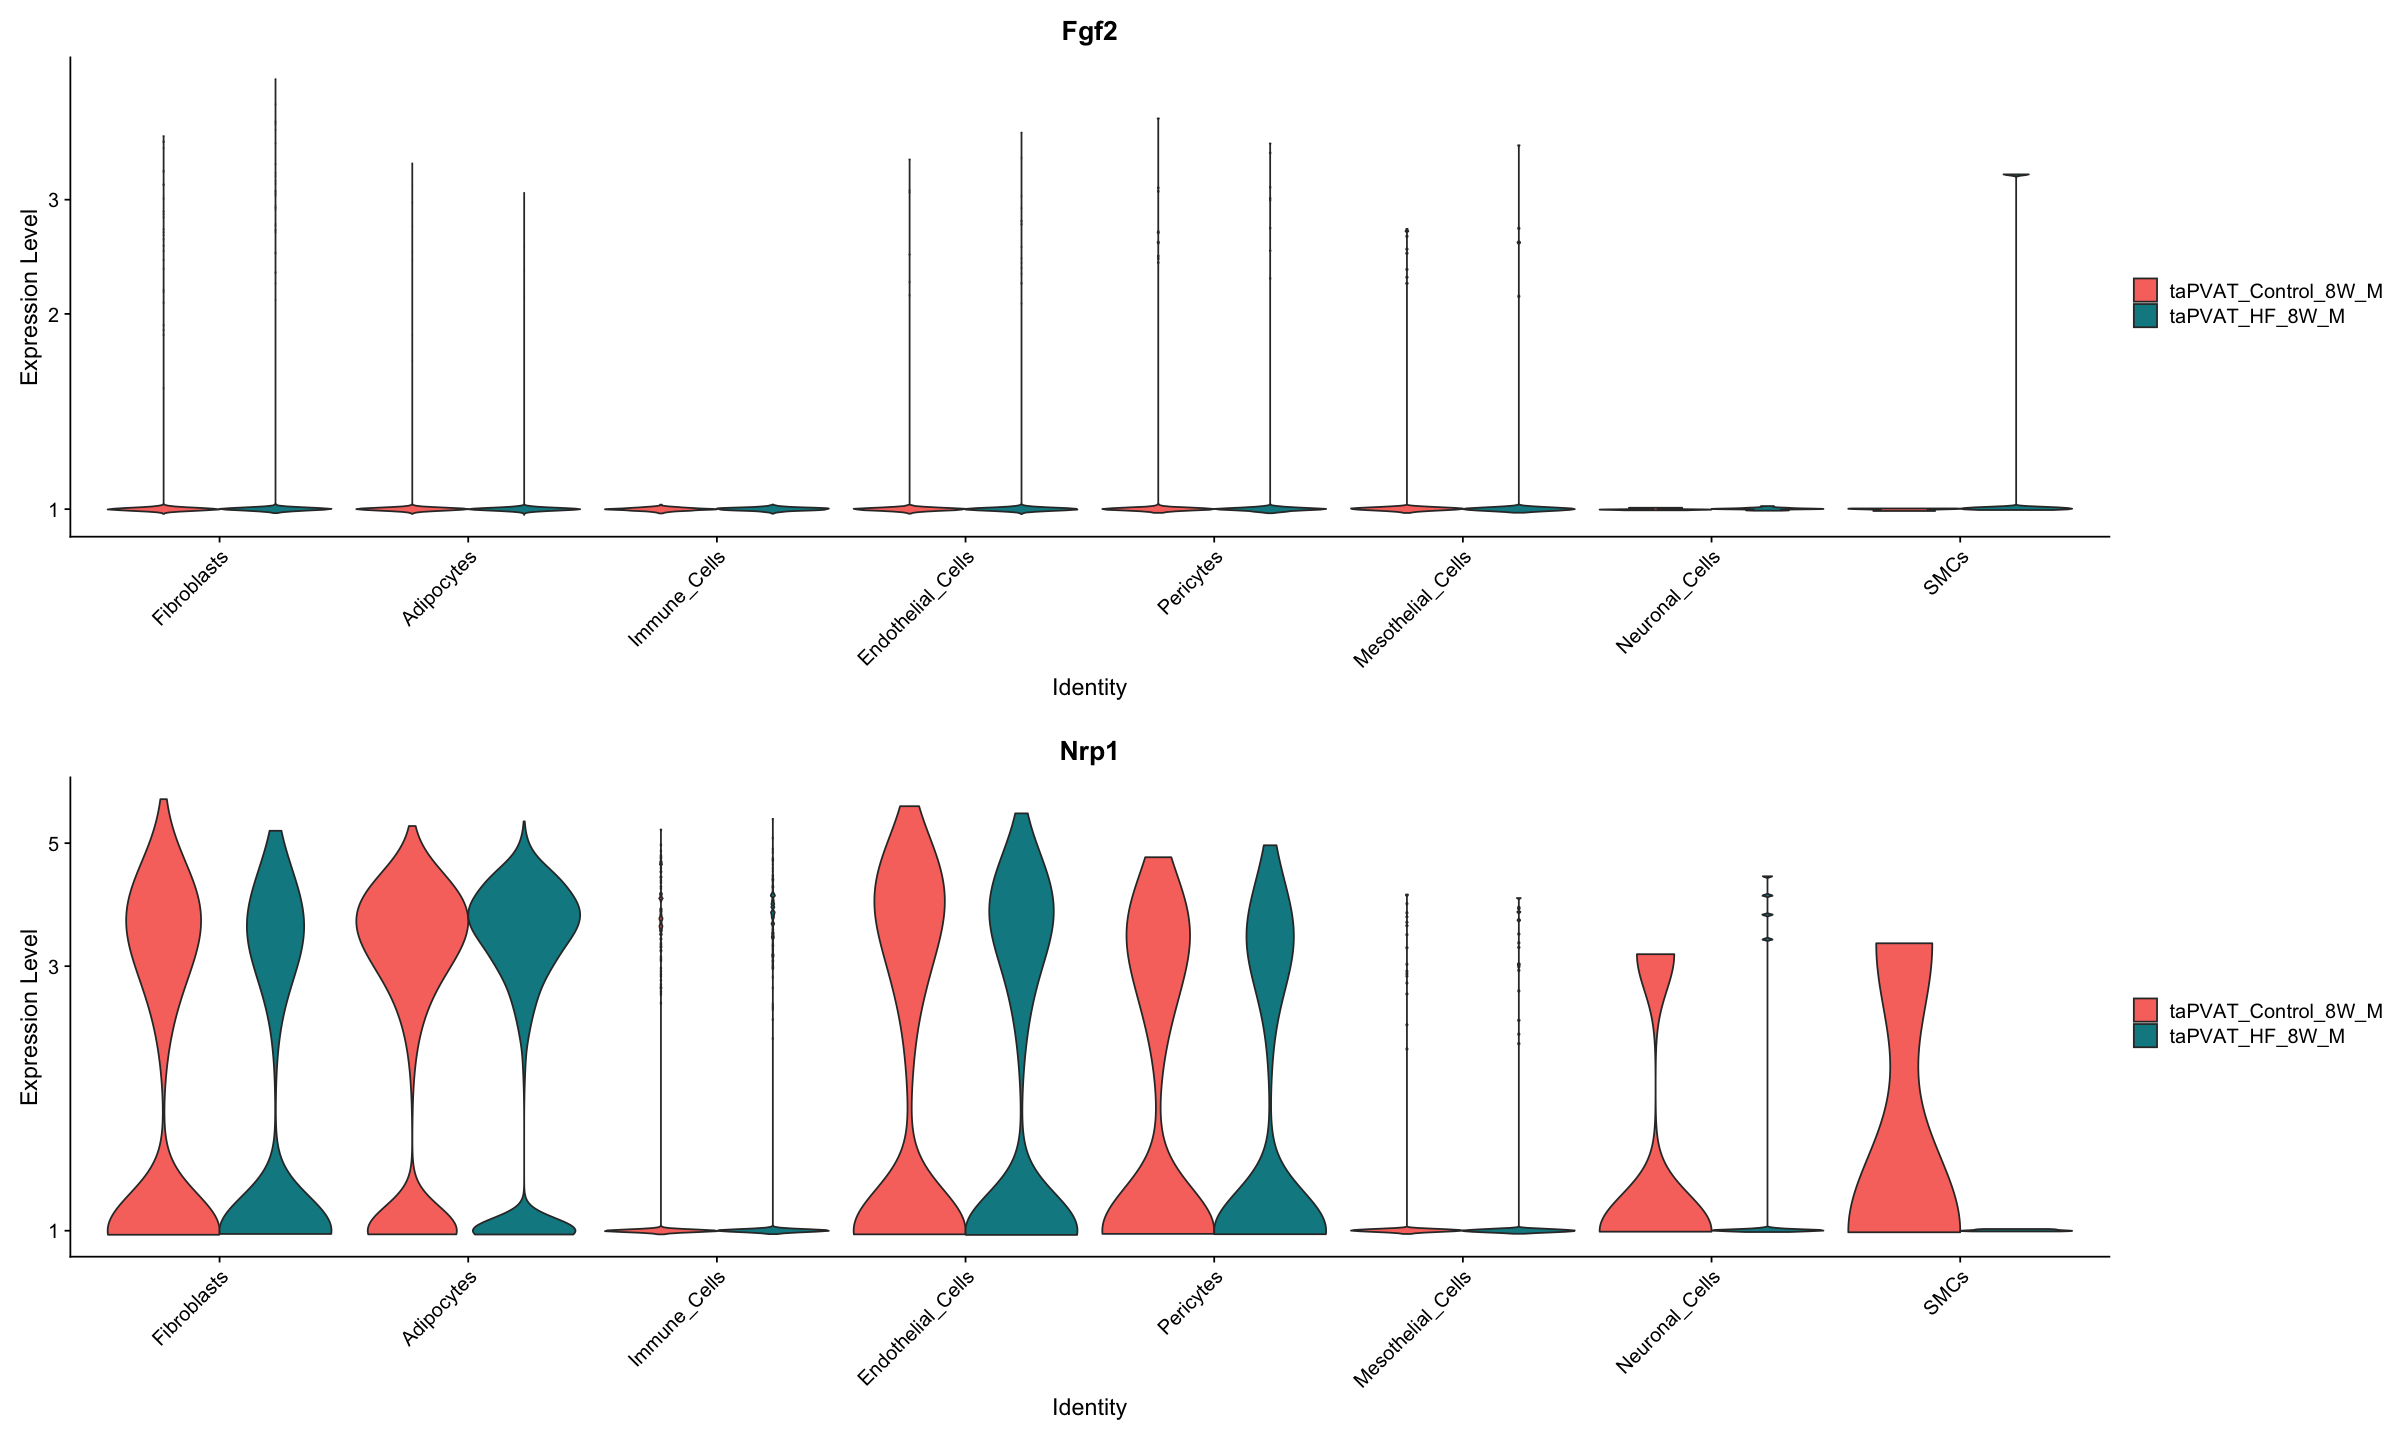

In [66]:
p1 <- VlnPlot(male_8weeks_rds,'Fgf2',split.by = 'sample_type',pt.size = 0,log=T)
p2 <- VlnPlot(male_8weeks_rds,'Nrp1',split.by = 'sample_type',pt.size = 0,log=T)
plot_grid(p1,p2,ncol=1)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_tex

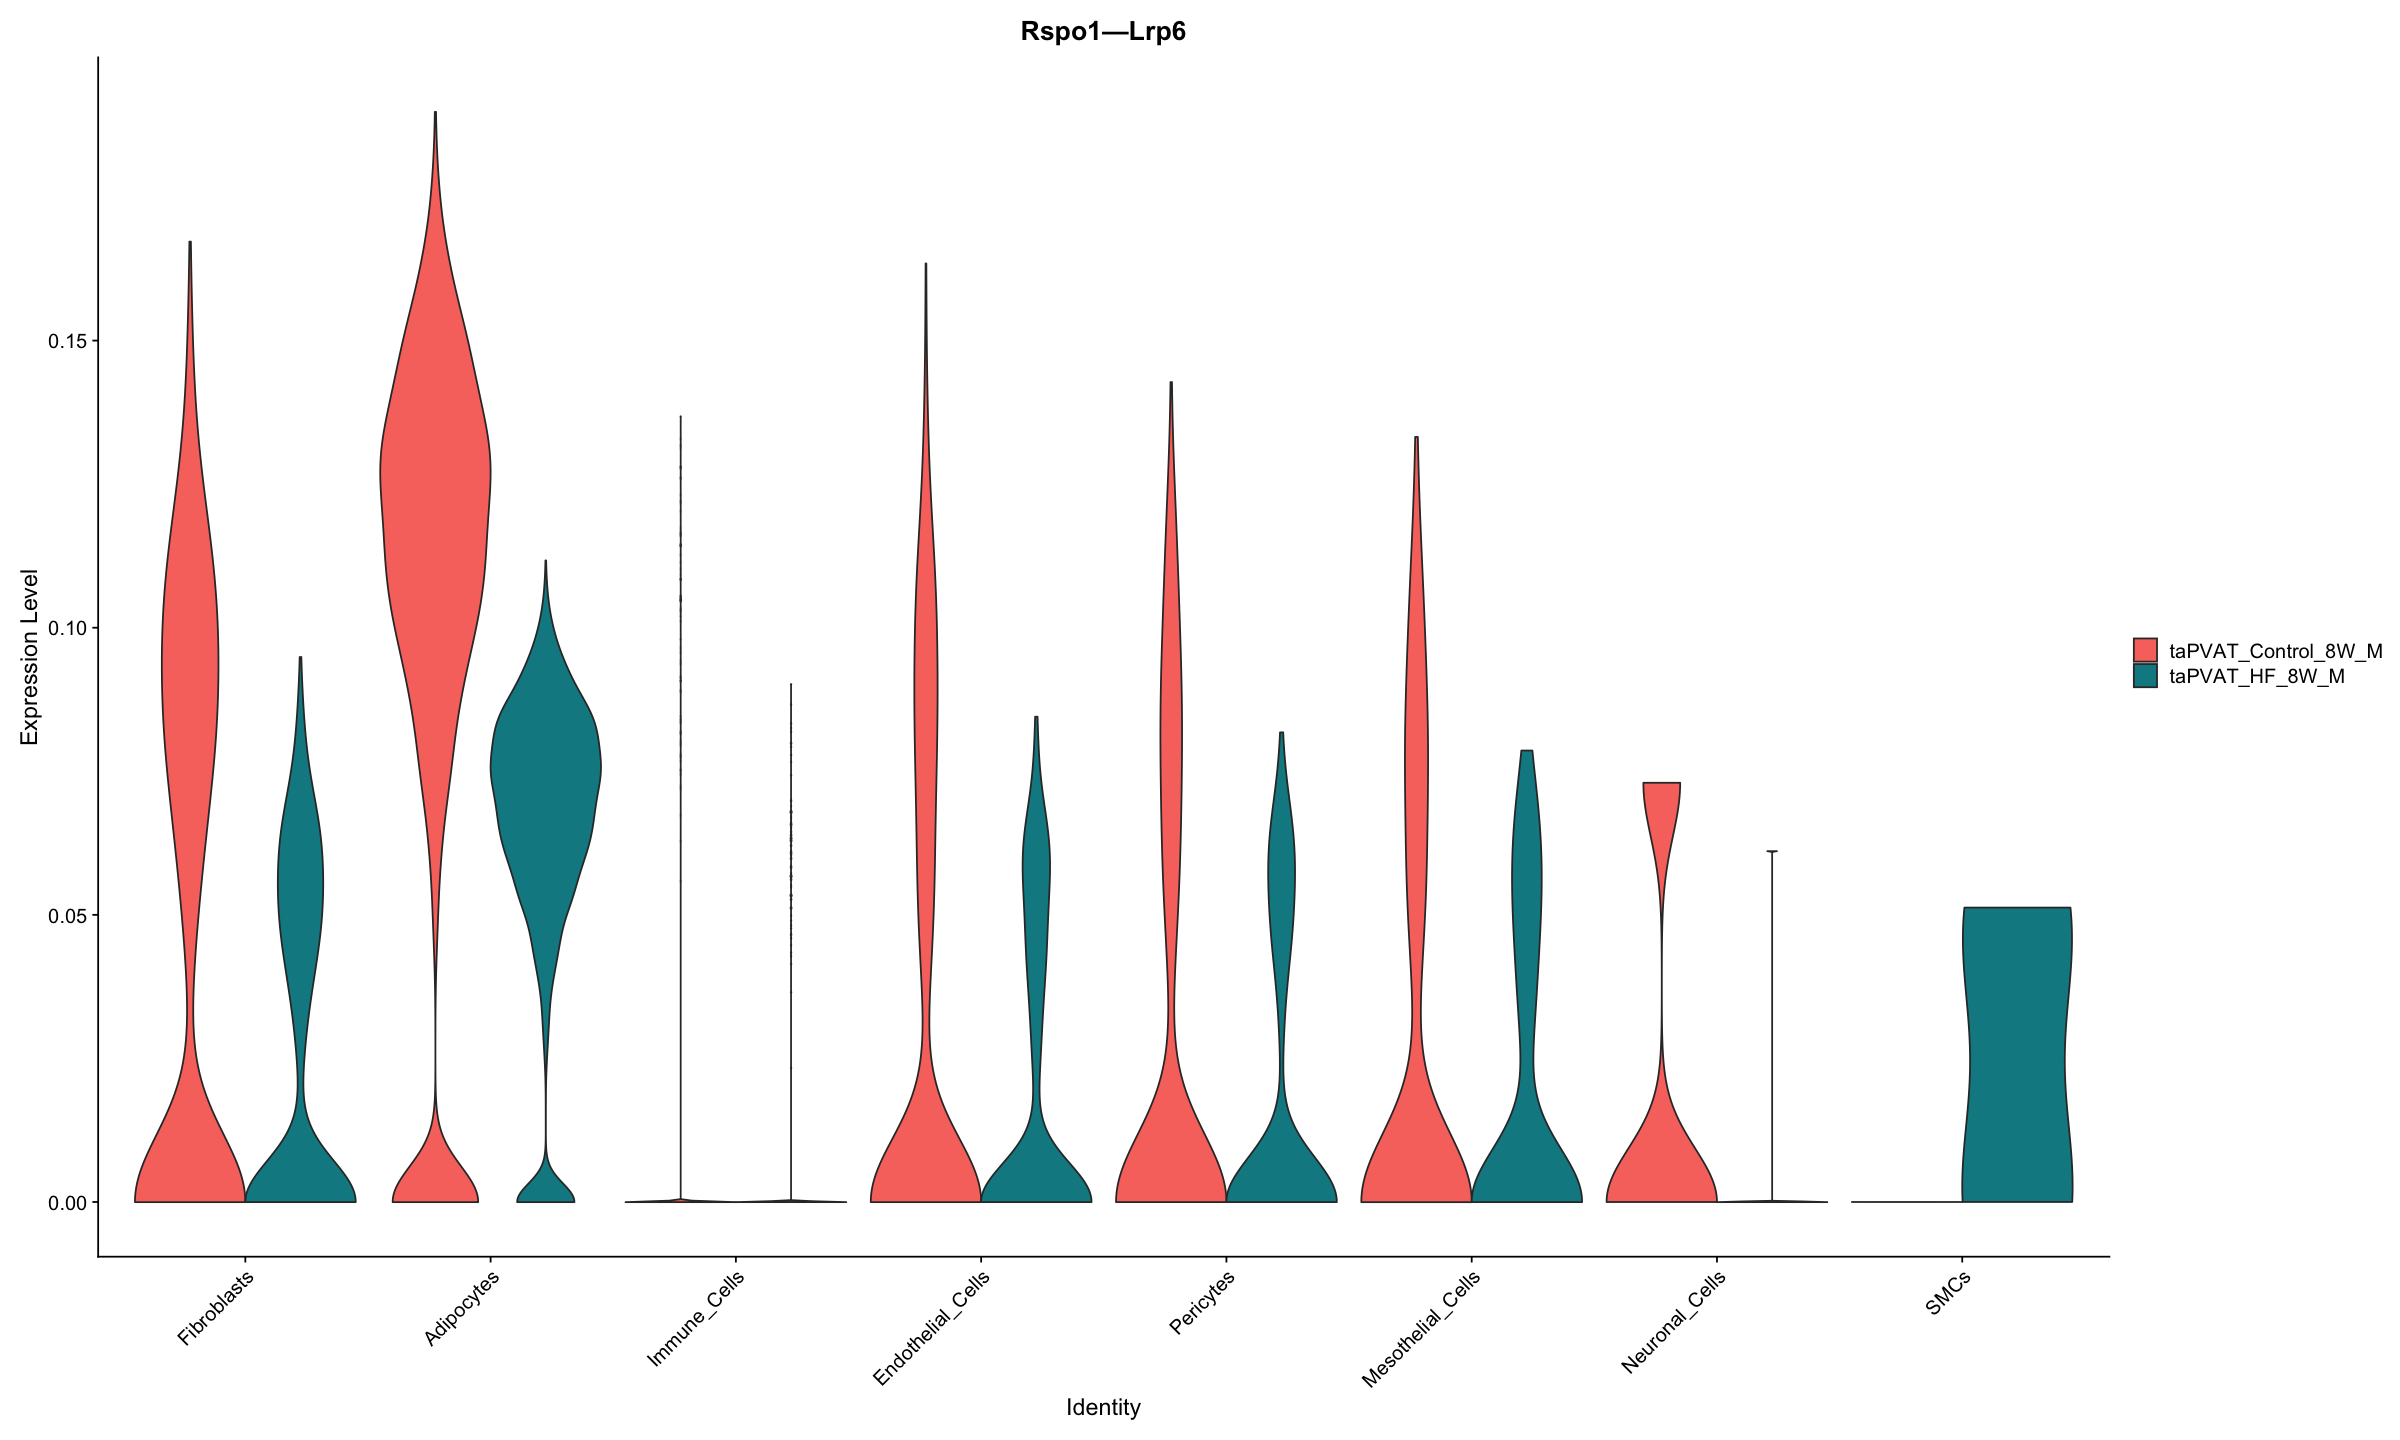

In [68]:
VlnPlot(scc.sub, 'Rspo1—Lrp6',split.by = 'Condition',pt.size = 0)

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  Tfpi—Lrp1, Calr—Lrp1, Serpine2—Lrp1, App—Lrp1, F8—Lrp1, Psap—Lrp1, Hsp90b1—Lrp1, Lpl—Lrp1, Plat—Lrp1, Lrpap1—Lrp1 
	   Nxph1—Nrxn1, Serping1—Lrp1, Psen1—Notch1, Mfap5—Notch1, Dll1—Notch1, Uba52—Notch1, Dll4—Notch1, Adam17—Notch1, Jag1—Notch1, Jag2—Notch1 
	   Rarres2—Cmklr1, Pdgfb—Lrp1, Ptn—Ptprs, Calr—Tshr, Apoe—Lrp1, Gnas—Tshr, Fn1—Tshr, Hspg2—Ptprs, Gnai2—Tshr, Icam1—Egfr 
Negative:  Lama2—Itgb1, Col1a1—Itgb1, Lamc1—Itgb1, Nid1—Itgb1, Col6a2—Itgb1, Adam9—Itgb1, Lamb1—Itgb1, Vtn—Itgb1, Adam12—Itgb1, Fn1—Itgb1 
	   Col6a1—Itgb1, Fbn1—Itgb1, Col4a1—Itgb1, Cxcl12—Itgb1, Col5a2—Itgb1, Col6a3—Itgb1, Fbln1—Itgb1, Col18a1—Itgb1, Timp2—Itgb1, Col1a2—Itgb1 
	   Hspg2—Itgb1, Adam15—Itgb1, Lama5—Itgb1, Col3a1—Itgb1, Col4a4—Itgb1, Npnt—Itgb1, Reln—Itgb1, Tgm2—Itgb1, Vcan—Itgb1, Col4a5—Itgb1 
PC_ 2 
Positive:  Vegfc—Itgb1, Col4a5—Itgb1, Vcam1—Itgb1, Reln—

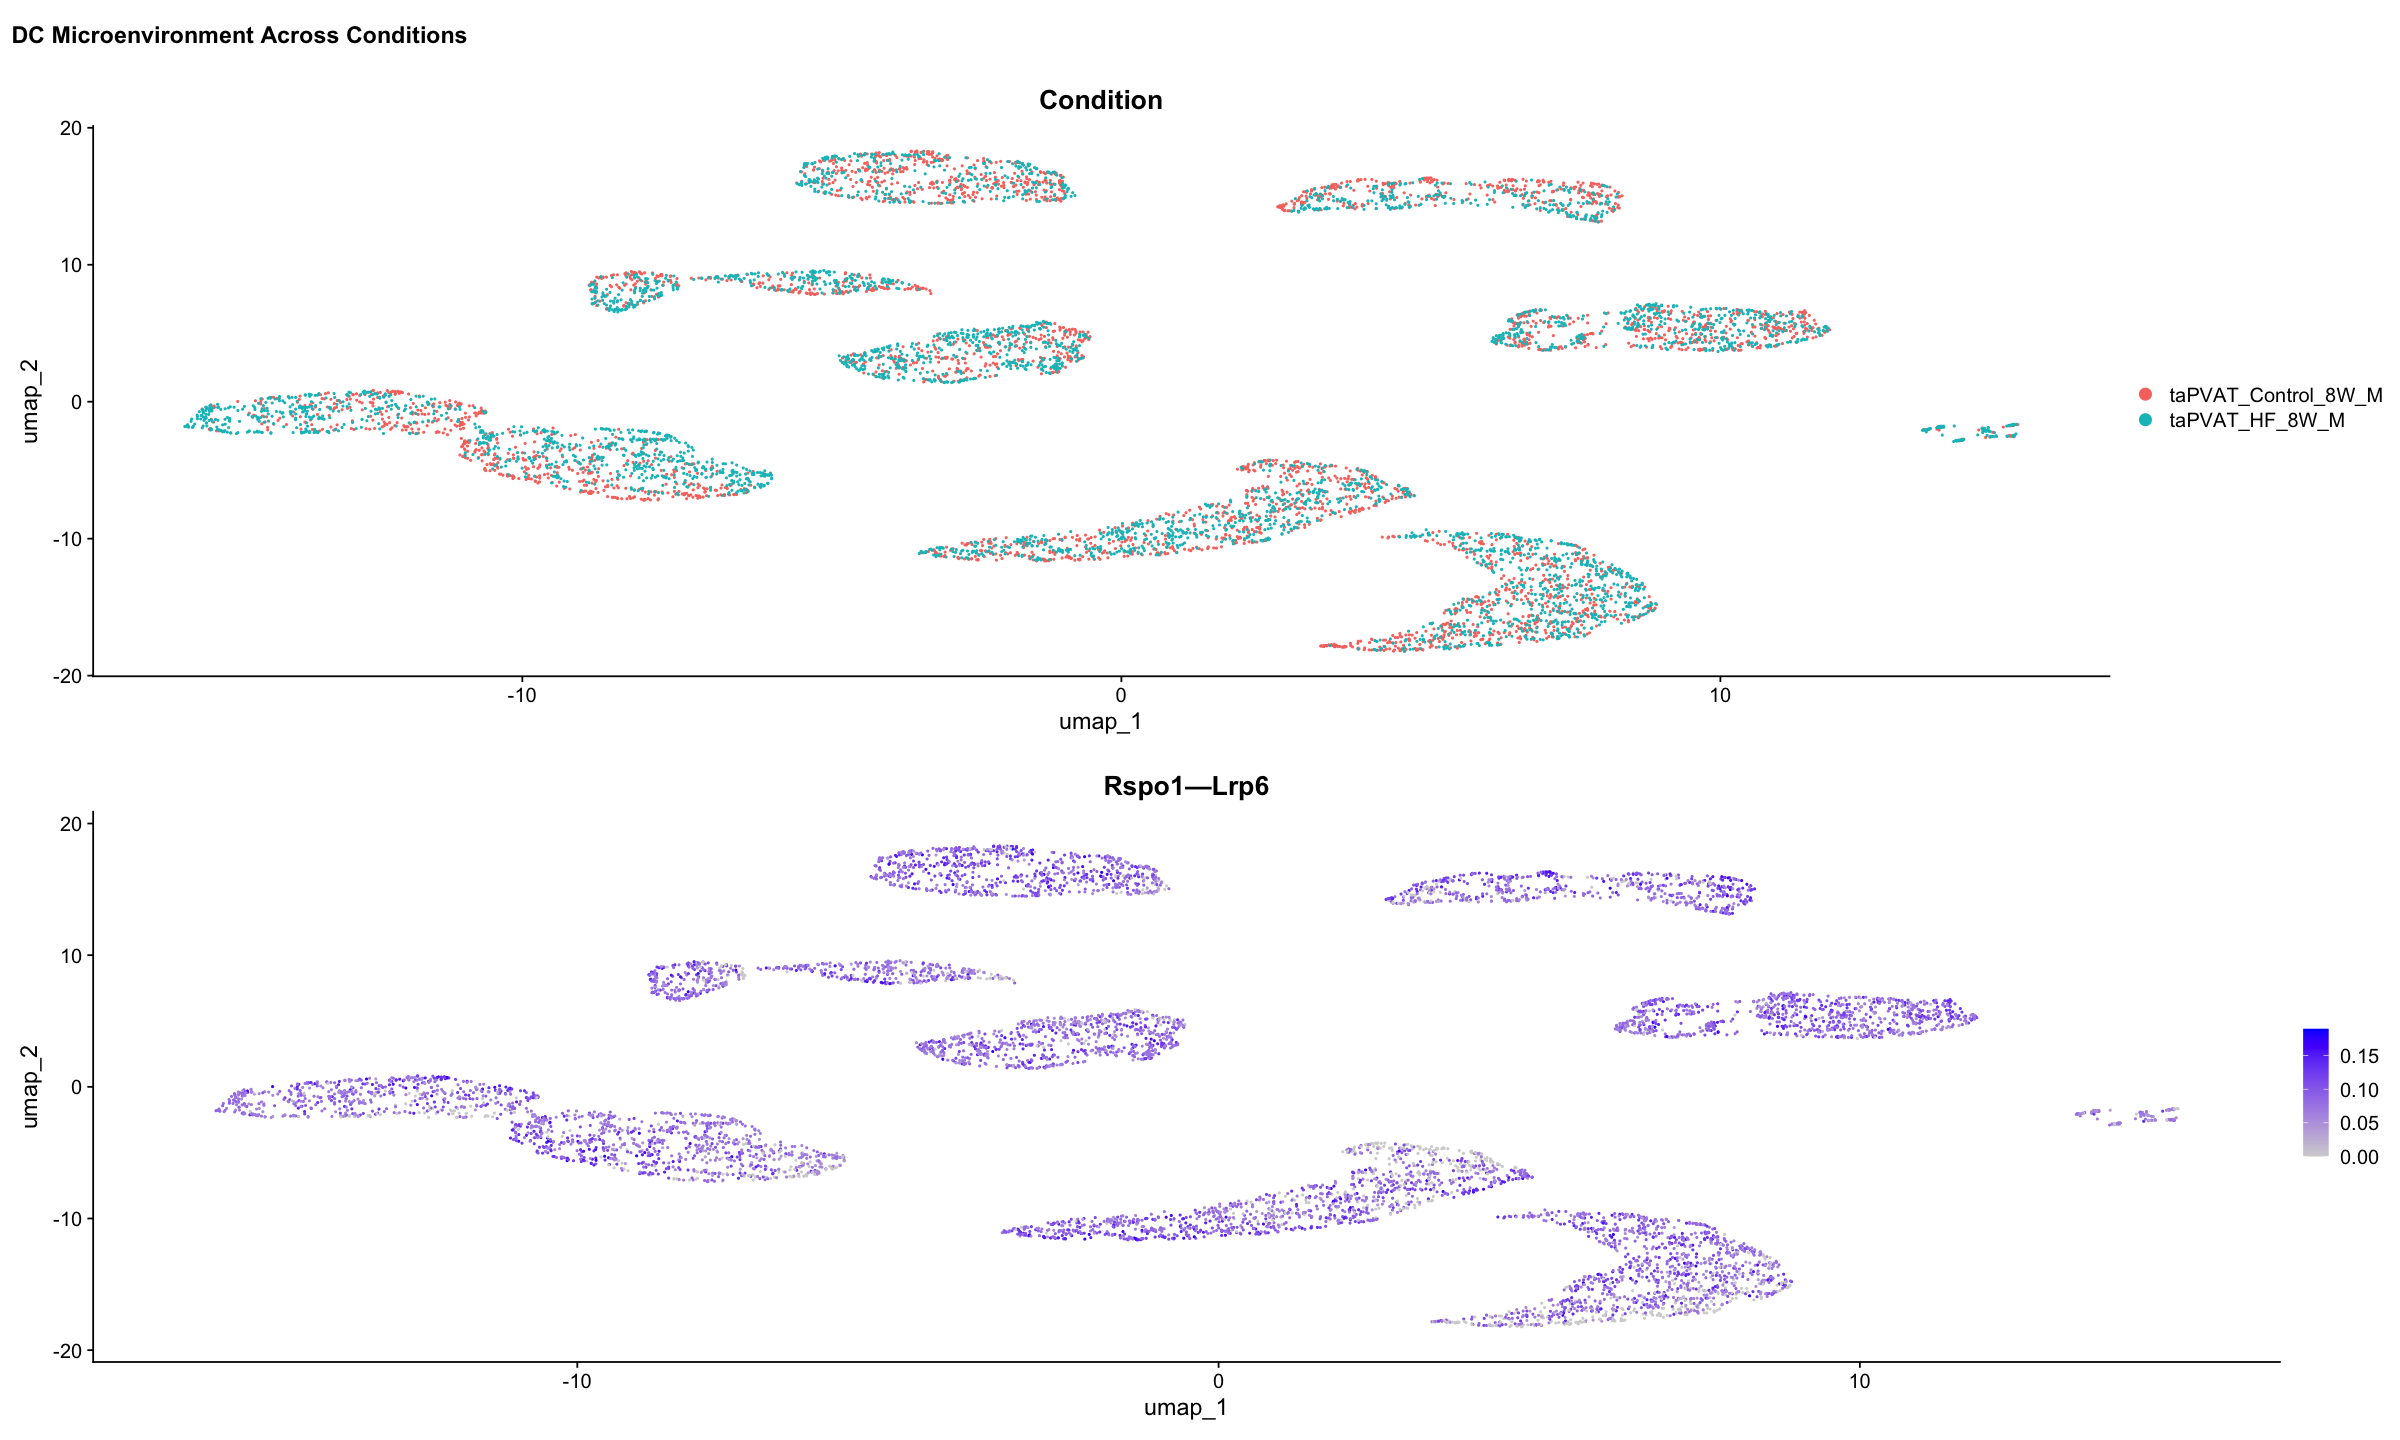

In [69]:
subs <- subset(scc.sub, idents = 'Adipocytes')
subs <- ScaleData(subs)
subs <- RunPCA(subs)
subs <- RunUMAP(subs,dims = 1:5)
p1 <- DimPlot(subs,group.by = 'Condition')
p2 <- FeaturePlot(subs,'Rspo1—Lrp6')
title <- ggdraw() + 
  draw_label(
    "DC Microenvironment Across Conditions",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(title,p1,p2,ncol=1,rel_heights = c(0.1, 1,1))